# Promedio de tiempo de partida general

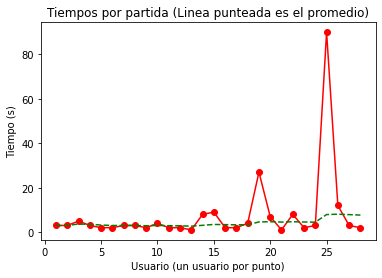

El promedio de tiempo de partida general es de 7.678571428571429 segundos


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

ruta = os.path.join(os.getcwd(), '..', 'src', 'datos', 'eventos_partidas.csv')
data_set = pd.read_csv(ruta, encoding='utf-8')

data_set = data_set[["id", "timestamp", "evento"]]
data_set = data_set[(data_set["evento"] == "inicio_partida") | (data_set["evento"] == "fin")]
cant_partidas = len(data_set)/2
tiempo_total = 0
partidas= []
tiempo_prom_part= []
usuarios= []
#Hago un for con doble paso para calcular los tiempos en inicios omitiendo los eventos "fin"
for i in range(1,len(data_set),2):
    tiempo_partida= data_set.iloc[i]["timestamp"] - data_set.iloc[i-1]["timestamp"]
    tiempo_total += tiempo_partida
    partidas.append(tiempo_partida)

#Hago un for con paso simple para calcular el promedio en cada partida
tot= 0
for i in range(int(cant_partidas)):
    tot+=partidas[i]
    tiempo_prom_part.append(tot/(i+1))
    usuarios.append(i+1)

plt.plot(usuarios,partidas,marker='o',color='r')
plt.plot(usuarios,tiempo_prom_part,linestyle= '--',color='green')
plt.xlabel('Usuario (un usuario por punto)')
plt.ylabel('Tiempo (s)')
plt.title('Tiempos por partida (Linea punteada es el promedio)')
plt.show()
print(f"El promedio de tiempo de partida general es de {tiempo_total/cant_partidas} segundos")
